# Reviewing Classification Problems

**GOALS**:
- Identify big idea with `LogisticRegression`
- Evaluate performance in terms of Accuracy, Precision, and Recall


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, classification_report
from sklearn.pipeline import make_pipeline
from sklearn.datasets import load_breast_cancer

In [2]:
cancer = load_breast_cancer()

In [3]:
df = pd.DataFrame(cancer.data, columns= cancer.feature_names)

In [4]:
df['target'] = cancer.target

In [5]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [7]:
X = df[['mean radius', 'mean fractal dimension']]
X_train, X_test, y_train, y_test = train_test_split(X, cancer.target)
clf = LogisticRegression()

In [8]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [9]:
pred = clf.predict(X_test)
print(classification_report(pred, y_test))

             precision    recall  f1-score   support

          0       0.80      0.93      0.86        42
          1       0.97      0.90      0.93       101

avg / total       0.92      0.91      0.91       143



In [10]:
import mglearn

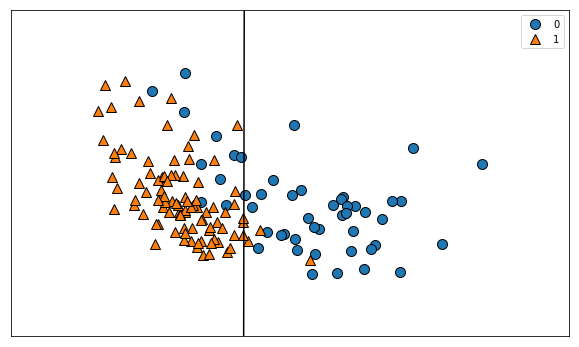

In [11]:
#X, y = mglearn.datasets.make_forge()
clf = clf.fit(X_train, y_train)
plt.figure(figsize = (10, 6))
mglearn.plots.plot_2d_separator(clf, np.array(X_test))
mglearn.discrete_scatter(X_test['mean radius'], X_test['mean fractal dimension'], y_test)
plt.ylim(min(X_test['mean fractal dimension'])-.01, max(X_test['mean fractal dimension'])+.01)
plt.legend()

In [12]:
print(classification_report(clf.predict(X_test), y_test))

             precision    recall  f1-score   support

          0       0.80      0.93      0.86        42
          1       0.97      0.90      0.93       101

avg / total       0.92      0.91      0.91       143



In [13]:
from sklearn.metrics import confusion_matrix

In [14]:
confusion_matrix(clf.predict(X_test), y_test)

array([[39,  3],
       [10, 91]])

### Problem

Using two other pairs of inputs, see if you can improve upon the recall score for the 1 category.  Plot the decision boundary and classes as demonstrated above.  Pay close attention to identifying the points that are contributing to differences in precision and recall.

In [15]:
X = df[['worst radius', 'worst fractal dimension']]
X_train, X_test, y_train, y_test = train_test_split(X, cancer.target)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print(classification_report(pred, y_test))

             precision    recall  f1-score   support

          0       0.89      0.96      0.92        49
          1       0.98      0.94      0.96        94

avg / total       0.95      0.94      0.94       143



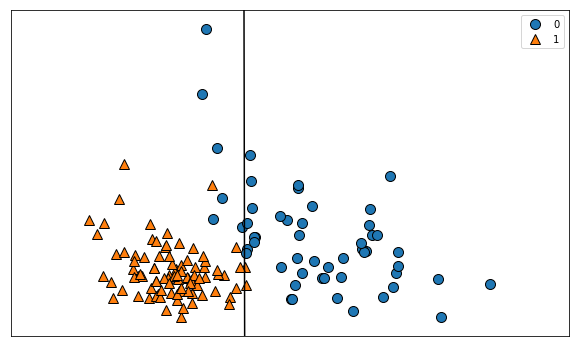

In [16]:
clf = clf.fit(X_train, y_train)
plt.figure(figsize = (10, 6))
mglearn.plots.plot_2d_separator(clf, np.array(X_test))
mglearn.discrete_scatter(X_test['worst radius'], X_test['worst fractal dimension'], y_test)
plt.ylim(min(X_test['worst fractal dimension'])-.01, max(X_test['worst fractal dimension'])+.01)
plt.legend()

### Problem

Using the PIMA diabetes dataset, your goal is to build a classifier that is:

1. Accurate
2. Appropriate

For information about the data, please see the brief description of the variables here: https://www.kaggle.com/uciml/pima-indians-diabetes-database/home 

Your results should include a clear framing of the question, brief description of the approach you used, and suggestions as to what else might be done to effect a better model.

In [20]:
pima = pd.read_csv('data/pima_diabetes.csv', index_col=0)

In [21]:
pima.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [22]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
preg     768 non-null int64
plas     768 non-null int64
pres     768 non-null int64
skin     768 non-null int64
test     768 non-null int64
mass     768 non-null float64
pedi     768 non-null float64
age      768 non-null int64
class    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


**About the data**
* `preg`: Number of times pregnant
* `plas`: Plasma glucose concentration after 2 hours in an oral glucose tolerance test
* `pres`: Diastolic blood pressure (mm Hg)
* `skin`: skin fold thickness (mm)
* `test`: 2-Hour serum insulin (mu U/ml)
* `mass`: Body mass index (weight in kg/(height in m)^2)
* `pedi`: pedigree function
* `age`: age (years)
* `class`: outcome (0 or 1)

In [23]:
# scale df using StandardScaler
from sklearn.preprocessing import StandardScaler

In [40]:
std_scaled = StandardScaler()
cols = pima.columns[:-1] # remove class column
pima_scaled = std_scaled.fit_transform(pima[[name for name in cols]])
pima_scaled = pd.DataFrame(pima_scaled, columns=cols)

In [41]:
pima_scaled.head()

,preg,plas,pres,skin,test,mass,pedi,age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [31]:
# train, test, split
X_scaled = pima_scaled
y = pima['class']

X_test_scaled, X_train_scaled, y_test, y_train = train_test_split(X_scaled,y)

In [39]:
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
print(classification_report(y_pred, y_test))

             precision    recall  f1-score   support

          0       0.80      0.81      0.80       375
          1       0.63      0.63      0.63       201

avg / total       0.74      0.74      0.74       576



In [42]:
from sklearn.metrics import accuracy_score

In [43]:
accuracy_score(y_test,y_pred)

0.7430555555555556